<a href="https://colab.research.google.com/github/YoussefAli10/iris-analysis-group1/blob/main/iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1. Github repo setup with print statements

In [ ]:
#Create print statements
print('Hello, Iris by Youssef')

Hello, Iris by Youssef


In [ ]:
print('Hello, Iris by Sibo')

Hello, Iris by Sibo


In [ ]:
print('Hello, Iris by Wendy')

Hello, Iris by Wendy


Phase 2


Use variables to store metadata

In [ ]:
# Store basic dataset metadata
#Assign variables to store metadata
n_rows = 150
dataset_name = "Iris Dataset"

#Use formatted strings to print metadata
print(f"Dataset: {dataset_name}")
print(f"Number of rows: {n_rows}")


Dataset: Iris Dataset
Number of rows: 150


To check petal length, we used if and else statements to check if it is a large or small petal.

In [ ]:
# Example: check petal length threshold
#Use if and else statements to check length of petal length
petal_length = 1.7
if petal_length > 1.5:
    print("Large petal")
else:
    print("Small petal")


Large petal


Use def keyword to define the function name (classify_flower) to find if petal_length is small,medium or large.

In [ ]:
#Use def function to classify sepal_length and petal_length
#Use if/elif/else statements to check whether the lengths are small,medium,large
def classify_flower(sepal_length, petal_length):
    """
    Returns a label 'small'/'medium'/'large' based on petal_length.
    (Simple thresholds for demo; not a trained model.)
    """
    if petal_length < 1.5:
        return "small"
    elif petal_length < 4.5:
        return "medium"
    else:
        return "large"

# quick sanity checks
print(classify_flower(5.1, 1.4))  # small
print(classify_flower(6.0, 3.5))  # medium
print(classify_flower(6.3, 5.0))  # large


small
medium
large


To iterate through iris species, we used a for loop

In [ ]:
# Iterate through Iris species and print them
species = ["setosa", "versicolor", "virginica"]
#For loop iterates through each item in the species list
for s in species:
    print(s)


setosa
versicolor
virginica


Phase 3

In [ ]:
#Import panda library to process raw CSV file
import pandas as pd
from IPython.display import display, HTML

#Assign configuration variables
RAW_DATA_FILE = 'iris.csv'
SUMMARY_FILE = 'summary.txt'
CLEANED_DATA_FILE = 'iris_cleaned.csv'

#Use formatted strings to print information
print(f"--- Phase 3: Starting Processing for {RAW_DATA_FILE} ---")

--- Phase 3: Starting Processing for iris.csv ---


In [ ]:
# --- Load, Clean, and Write Summary ---

# 1. Load data correctly (using default comma delimiter) and assign columns
df = pd.read_csv(RAW_DATA_FILE, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
initial_rows = len(df)

# 2. Core Cleaning Steps:
#Drop duplicates to ensure the analysis is accurate and unique
df.drop_duplicates(inplace=True)
# Coerce measurement columns to numeric and drop rows with resulting NaNs
df.iloc[:, 0:4] = df.iloc[:, 0:4].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
final_rows = len(df)

# 3. Calculate Sepal Length Stats (for summary.txt)
stats = df['sepal_length'].agg(['min', 'max', 'mean'])

# 4. Write summary.txt (consolidation of Block 2 logic)
with open(SUMMARY_FILE, mode='w') as outfile:
    outfile.write(f"""
--- IRIS Dataset Summary ---
Total Rows Processed: {initial_rows}
Final Cleaned Rows: {final_rows}

Sepal Length (cm) Statistics:
Minimum: {stats['min']:.2f}
Maximum: {stats['max']:.2f}
Average: {stats['mean']:.2f}
""".strip())

print(f" Summary written to {SUMMARY_FILE} with final row count.")

 Summary written to summary.txt with final row count.


In [ ]:
# --- Enhanced Initial Data Report ---
print("\n--- Initial Data Preview ---")
display(
    df.head().style
    .format(formatter={
        'sepal_length': '{:.1f}',
        'sepal_width': '{:.1f}',
        'petal_length': '{:.1f}',
        'petal_width': '{:.1f}'
    })
    .set_table_attributes("style='font-size: 10pt;'")
    .set_caption("First 5 Cleaned Rows")

)

# --- Final Enhanced Cleaning Summary ---
rows_removed_duplicates = initial_rows - final_rows # Simplified calculation

print("\n--- Final Cleaning Summary ---")

cleaning_summary_data = {
    'Metric': ['Initial Rows Loaded', 'Total Rows Removed', 'Final Cleaned Rows'],
    'Value': [initial_rows, rows_removed_duplicates, final_rows]
}
summary_df_vis = pd.DataFrame(cleaning_summary_data)

# Style the final summary table
display(
    summary_df_vis.style
    .set_properties(**{'background-color': '#f0f8ff', 'border-color': 'white'})
    .hide(axis='index')
    .set_caption("Summary of Data Cleaning Steps")
    .set_table_attributes("style='font-size: 12pt;'")
)

# --- Save Cleaned Data ---
df.to_csv(CLEANED_DATA_FILE, index=False)

print(f"\n Final cleaned data saved to {CLEANED_DATA_FILE}.")




--- Initial Data Preview ---


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa



--- Final Cleaning Summary ---


Metric,Value
Initial Rows Loaded,151
Total Rows Removed,4
Final Cleaned Rows,147



 Final cleaned data saved to iris_cleaned.csv.


In [ ]:
#Phase 4

Seaborn library is used to load and read the raw csv file. Created an empty dictionary store the count of each flower in the species. Used a for loop to iterate through each species.

In [ ]:
#Count how many flowers of each species manually with a for loop
import pandas as pd
import seaborn as sns
#Load iris dataset to read all data in the csv file
iris_fl = sns.load_dataset('iris')

#Create an empty dictionary to store the count of each flower based off species.
#The keys will be species and the values will be the counts
flower_count={}

#Use for loop to count each flower.
for flower in iris_fl['species']:
    if flower in flower_count:
        flower_count[flower] +=1
    else:
        flower_count[flower] =1
#Print results
for species, count in flower_count.items():
    print(f"{species}:{count}")

setosa:50
versicolor:50
virginica:50


Used if/elif/esle statements to categorize flowers based off length. We created a new column to show petal_category.

In [6]:
#Categorize flowers
import pandas as pd
import seaborn as sns
#Load iris dataset
iris = sns.load_dataset('iris')

#Use def function to categorize flowers
def categorize_flower(length):
    if length < 2:
        return 'Short Petal'
    elif 2 <= length <= 5:
        return 'Medium Petal'
    else:
        return 'Long Petal'

#Create a new column and print results
iris['petal_category'] = iris['petal_length'].apply(categorize_flower)
print(iris[['petal_length','petal_category']].head())

   petal_length petal_category
0           1.4    Short Petal
1           1.4    Short Petal
2           1.3    Short Petal
3           1.5    Short Petal
4           1.4    Short Petal


To find mean, median, min, max of sepal and petal lengths, we used an aggregate function to combine all the above calculations into one table.

In [7]:
#Calculate mean, median, min, max of sepal and petal lengths
Value_calculations = iris[['sepal_length','petal_length']].agg(['mean','median','min','max'])
print(Value_calculations)

        sepal_length  petal_length
mean        5.843333         3.758
median      5.800000         4.350
min         4.300000         1.000
max         7.900000         6.900


Used groupby function to group the rows based off species and find the average of sepal_length and petal_length.

In [8]:
#Group by species and compute averages
average_values=iris.groupby('species')[['sepal_length','petal_length']].mean()
print("Mean values for each species")
print(average_values)

Mean values for each species
            sepal_length  petal_length
species                               
setosa             5.006         1.462
versicolor         5.936         4.260
virginica          6.588         5.552


Imported matplotlib.pyplot libraries to plot a histogram with the petal_length column as the x axis and the frequency as the y axis.

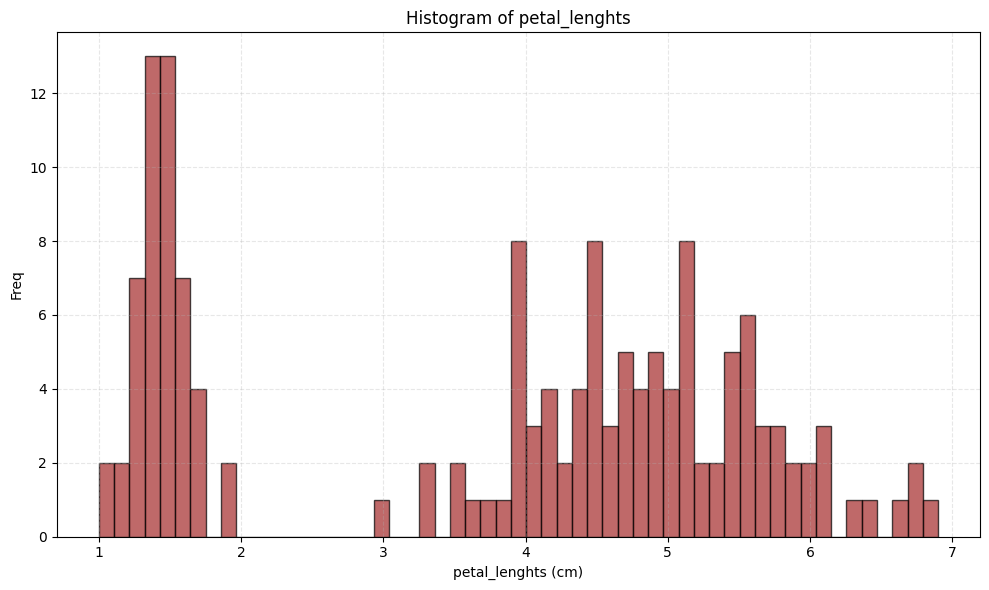

In [10]:
#Histogram of petal lengths.
import matplotlib.pyplot as plt

data = iris['petal_length']

#Plot histogram
plt.figure(figsize=(10,6))
plt.hist(data, bins=55, color='brown',edgecolor='black',alpha=0.7)

#Histogram titles and labels
plt.title('Histogram of petal_lenghts')
plt.xlabel('petal_lenghts (cm)')
plt.ylabel('Freq')
plt.grid(True, linestyle='--',alpha=0.3)
plt.xticks

#Show histogram
plt.tight_layout()
plt.show()

To create a bar chart of the average sepal length per species, we created a varaible(avg_sepal_length) and used groupby method to find the mean of sepal length based off species. The variable(avg_sepal_length) is used to plot the bar chart.

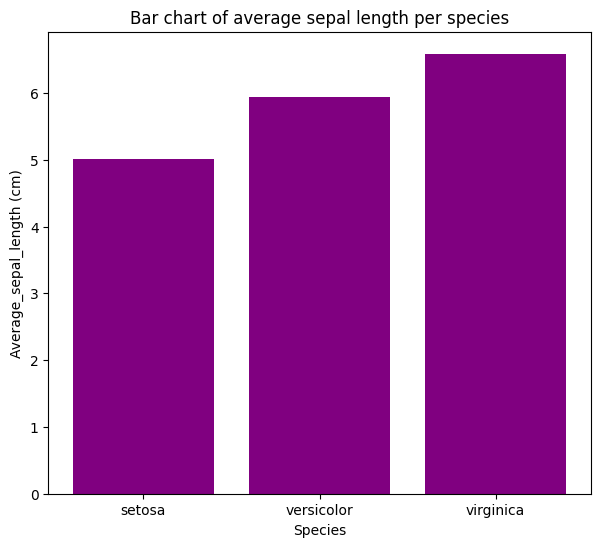

In [11]:
#Bar chart of average sepal length per species.
import matplotlib.pyplot as plt

#Calculate average sepal length per species
avg_sepal_length=iris.groupby('species')['sepal_length'].mean()

#Plot Bar chart
plt.figure(figsize=(7,6))
plt.bar(avg_sepal_length.index, avg_sepal_length, color='purple')

#Bar chart titles and labels
plt.title('Bar chart of average sepal length per species')
plt.xlabel('Species')
plt.ylabel('Average_sepal_length (cm)')

#Show bar chart
plt.show()

To find range,median and the largest spread, we used a boxplot becuase it provides the interquartile range fo the the dataset.

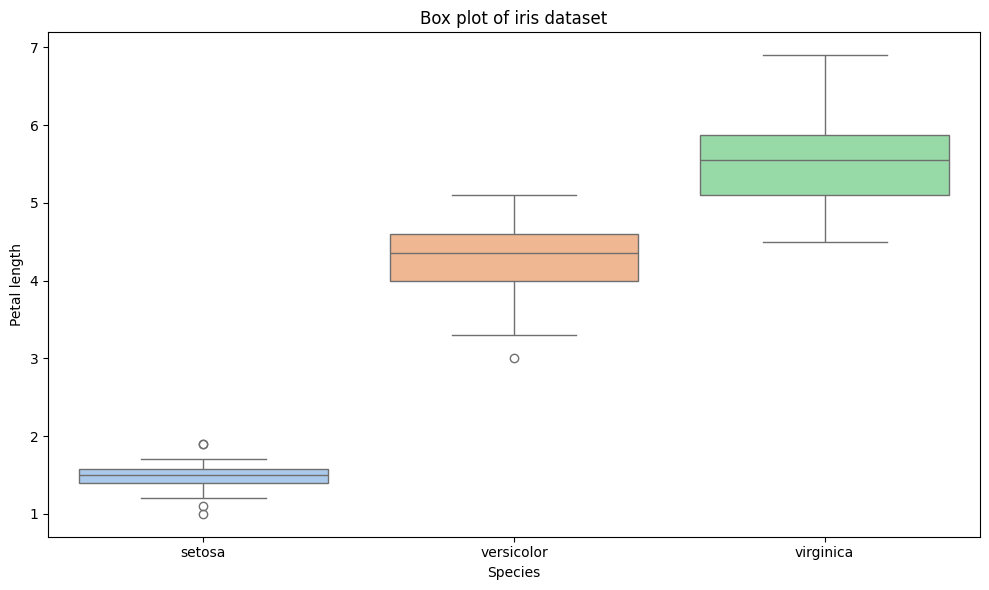

In [13]:
#Create a boxplot and answer the following questions:
#Box plot
iris= sns.load_dataset('iris')
plt.figure(figsize=(10,6))
sns.boxplot(x='species', y='petal_length', hue='species', data=iris, palette='pastel', legend=False)

#Titles and labels
plt.title('Box plot of iris dataset')
plt.xlabel('Species')
plt.ylabel('Petal length')
plt.tight_layout()
plt.show()

Setosa has the smallest range (approximately 1.0-1.9 cm) because it has the shortest distance between minimium and maximum values.

Virginica has the largest spread (approximately 4.5-6.9 cm) because it has the longest box and whiskers. Also, the values have a long interquartile range.

Based off the boxplot, the horizontal line inside each box determines the median therefore setosa has the lowest median(approximately 1.5cm), versicolor has a medium-sized medium(approximately 4.5cm), and virginica has the largest median(approximately 6.5cm)

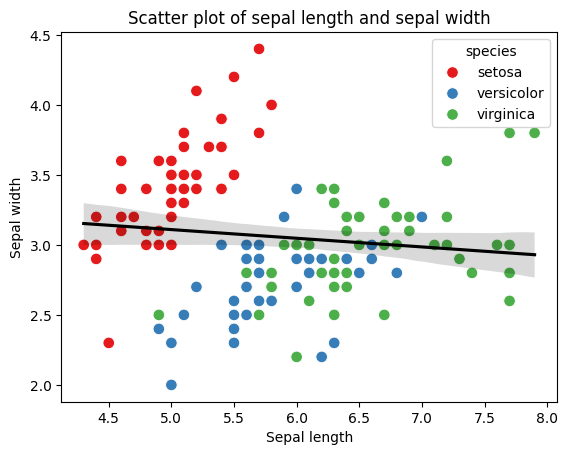

In [ ]:
#Do sepal length and sepal width appear strongly correlated?
#Explain why or why not using evidence from a scatter plot.
import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species', data=iris_fl, palette='Set1',s=70, alpha=1)

#Add a regression line to the scatter plot to determine correlation
sns.regplot(x='sepal_length', y='sepal_width',data=iris_fl,scatter=False,color='black')

#Plot title and labels
plt.title('Scatter plot of sepal length and sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

No, sepal length and sepal width are not strongly correlated for setosa because the points are widely scattered to from the regression line and the direction of the line is downwards hence a negative correlation

For versicolor, sepal length and sepal width are strongly correlated because most of the points (10 or more) are close to the regression line.

For versicolor, sepal length and sepal width are moderately correlated because most of the points (10 or more) are close to the regression line. It also has a negative correlation because the slope is downwards.

Based on the scatter, boxplot, and histogram, which flower features (sepal length, sepal width, petal length, petal width) seem most useful for separating the species?

Petal length and petal width seem most useful separating the species because the values are separated into three categorizes (small,medium,large) and it is easy to answer questions about the quaritile range, ma and min values, mean, and medium. There is also minimal overlap ensuring all values are accounted for.